<h3>Compartment: Cafeteria, Delivery area, Trash area</h3>

Enclosure area

<img src="Cafeteria.png" style="width: 500px;"/>

In [188]:
import numpy as np
import pandas as pd
import sympy as sp
import handcalcs.render
from handcalcs import handcalc
import forallpeople as si
import matplotlib.pyplot as plt
%matplotlib inline
from math import tan, sin,cos, pi, radians, sqrt, trunc
from IPython.display import display, Markdown
si.environment('thermal', top_level=True)

In [189]:
from fire_functions import Fire_load, diff_layers, gamma_f

<h4>Fuel load density</h4>

In [190]:
q = Fire_load('office')

In [191]:
%%render 2
q

<IPython.core.display.Latex object>

<h4>Opening factor<h4>

Enclosure area

In [192]:
%%render param 2
#Area of the "cube" of the compartment

B = 21.9*m
L = 23.5*m
H = 4*m
C_w1 = (5.22*2+0.4)*m
C_w2 = 12.76*m


<IPython.core.display.Latex object>

In [193]:
%%render 2

A_f = B*L-(C_w1*C_w2+3.3*m*4.81*m)
A_c = A_f

<IPython.core.display.Latex object>

In [194]:
%%render 2

Facade_w = L+2*B +6.58*m
Ins_w = 7.94*m + 8.19*m
Core_w = C_w1 + 8.76*m

<IPython.core.display.Latex object>

In [195]:
%%render 2

A_F = Facade_w*H
A_Ins = H*Ins_w
A_Core = H*Core_w
A_t = A_f + A_c + A_F + A_Ins +A_Core

<IPython.core.display.Latex object>

Air flow factor

In [196]:
%%render param 2

h_door_1 = 3.39*m#height of door, 1
w_door_1 = 1*m#width of door, 1

h_door_2 = 2.51*m #height of door, 2
w_door_2 = 1*m #width of door, 2


<IPython.core.display.Latex object>

In [197]:
%%render 2

A_door_1 = h_door_1*w_door_1 #area of door,1
A_door_2 = h_door_2*w_door_2 #area of door,2
A_o =  6*A_door_1 + 3*A_door_2 #Total opening area
h_av = (6*h_door_1*A_door_1+3*h_door_2*A_door_2)/A_o #Average opening height
AF = (A_o*sqrt(h_av))*m**(1/2) #Air flow factor
O = max((AF/A_t).prefix('unity'),(0.02*m**0.5).prefix('unity')) #Opening factor

<IPython.core.display.Latex object>

In [198]:
%%render 2
t_max = 0.0078*(q.value/10**6)/O.value #min

<IPython.core.display.Latex object>

<h4>Thermal inertia</h4>
Glass façade

The façade in the Cafeteria compartment is composed only by façade glass

In [199]:
rho = (2700*kg/(m**3)).prefix('unity')
c = 840*J/(kg*K)
lamb = 0.0266*W/(m*K)


In [200]:
%%render 2

b_G = (rho*c*lamb)**0.5

<IPython.core.display.Latex object>

In [201]:
%%render 2

b_F = b_G

<IPython.core.display.Latex object>

Core walls - concrete

In [202]:
%%render 2

b_Core = (1365*W*s**0.5/K/m**2)

<IPython.core.display.Latex object>

Insulated walls

In [203]:
b_Ins = diff_layers(25/1000,1180,951,0.154,150,790,0.218,t_max)*W*s**0.5/K/m**2

In [204]:
%%render 2
b_Ins

<IPython.core.display.Latex object>

Floor

In [205]:
b_f = diff_layers(30/1000,1150,1000,0.4,1180,951,0.154,t_max)*W*s**0.5/K/m**2

In [206]:
%%render 2

b_f

<IPython.core.display.Latex object>

The ceiling of the compartment is a concrete SL-Deck


In [207]:
%%render 2

b_c = (1365*W_m_K*s**0.5/m)

<IPython.core.display.Latex object>

* For different walls in the enclosure

In [208]:
%%render symbolic

b_t = (A_f*b_f +A_c*b_c + A_F*b_F + A_Ins*b_Ins +A_Core*b_Core)/A_t

<IPython.core.display.Latex object>

In [209]:
%%render 2
b_t

<IPython.core.display.Latex object>

Parametric curve validity check

In [210]:
if A_f >= 500: 
    display(Markdown('Compartment size not compatible with model.'))
elif H >= 4:
    display(Markdown('Compartment height not compatible with model.'))
elif not(0.019 < O <= 0.2):
    display(Markdown('Opening factor not compatible with model.'))
elif not(100<=b_t<=2200):
    display(Markdown('Thermal inertia not compatible with model.'))
elif not(50*10**9 < q*(A_t) < 1000*10**9):
    display(Markdown('Fuel load not compatible with model.'))
else:
    display(Markdown('Compartment size, height, opening factor, thermal inertia, and fuel load are compatible with model.'))

Compartment height not compatible with model.

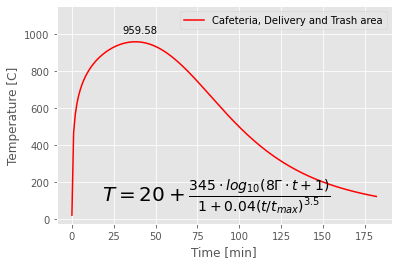

In [211]:
t_max = 0.0078*(q.value/10**6)/O.value
t = np.arange(0,t_max*5)
T = 20+345*np.log10(8*gamma_f(O,b_t)*t+1)/(1+0.04*(t/t_max)**3.5)
T_max = T.max()
plt.style.use('ggplot')
plt.plot(t,T, label="Cafeteria, Delivery and Trash area", color = 'red')
plt.ylim(ymax=max(T)*1.2)
plt.legend()
plt.xlabel("Time [min]")
plt.ylabel("Temperature [C]")
plt.text(0.5 * (0 + t_max), 0.1 * (0 + T_max),
     r"$T=20 + \frac{345\cdot log_{10}(8\Gamma \cdot t+1)}{1+0.04(t/t_{max})^{3.5}}$", horizontalalignment='left',
     fontsize=20)
plt.annotate(str(round(T_max,2)),xy=(0.8*t[T.argmax()],1.05*T.max()))
plt.show()

In [212]:
T_max_dsp = T_max*dC
t_max_dsp = t_max*minute
display(Markdown('Maximum temperature %s' % round(T_max_dsp,0)))
display(Markdown('occurs at %s' % round(t_max_dsp,0)))

Maximum temperature 960 °C

occurs at 37 minutes